In [1]:
import pandas as pd

In [2]:
%matplotlib inline

import matplotlib
import numpy as np

import matplotlib.pyplot as plt

# Similarity corpus

In [3]:
SIMILARITY_PATH = '/home/mgimenez/Dev/corpora/Similarity/corpus_similaridad.xlsx'

In [4]:
pd_sim = pd.read_excel(SIMILARITY_PATH, names=['id', 'tweet_1','tweet_2','similarity'])

In [5]:
pd_sim.groupby('similarity').size()

similarity
High similarity                           12113
Low similarity or no similarity at all    40790
Medium similarity                          1888
dtype: int64

In [6]:
pd_sim.shape

(54791, 4)

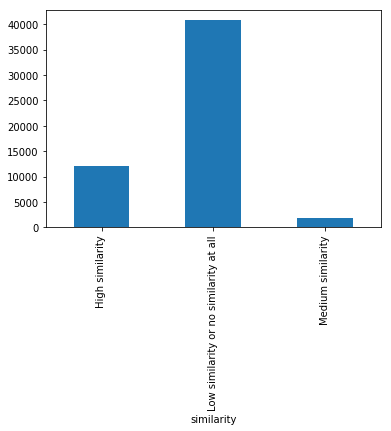

In [7]:
pd_sim.groupby('similarity').size().plot(kind='bar')

In [8]:
pd_sim.loc[pd_sim.similarity == 'Medium similarity', 'similarity'] = 'High similarity'
pd_sim.head()

,id,tweet_1,tweet_2,similarity
0,10500539,Rep. Adam Kinzinger responds after Rockford re...,Rep. Adam Kinzinger responds after Rockford re...,High similarity
1,12009202,#BobWoodward>#WhiteHouse Obsess DailyInterfere...,"@enricof88 ISIS expands into Afghanistan, Indi...",Low similarity or no similarity at all
2,2467889,"@celiaj02 ISIS expands into Afghanistan, India...","@Joe4lurvs ISIS expands into Afghanistan, Indi...",High similarity
3,3184087,Opinion: We need Arab boots on the ground to d...,@zeefa64 Zee Zembry Why #isis criminals think ...,Low similarity or no similarity at all
4,7166279,"@MailOnline: Taliban-turned-ISIS commander, an...","""As young women go, so will societies."" Powerf...",Low similarity or no similarity at all


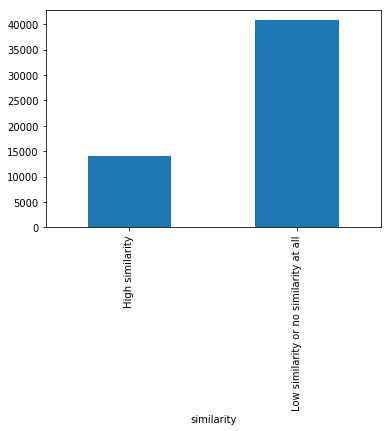

In [9]:
pd_sim.groupby('similarity').size().plot(kind='bar')

In [10]:
pd_sim.groupby('similarity').size()

similarity
High similarity                           14001
Low similarity or no similarity at all    40790
dtype: int64

# Quora Dataset

In [11]:
QUORA_PATH = '/home/mgimenez/Dev/corpora/Quora/quora_duplicate_questions.tsv'

In [12]:
pd_quora = pd.read_csv(QUORA_PATH, sep='\t', header=0)
pd_quora.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [13]:
pd_quora.shape

(404351, 6)

In [14]:
pd_quora.groupby('is_duplicate').size()

is_duplicate
0    255045
1    149306
dtype: int64

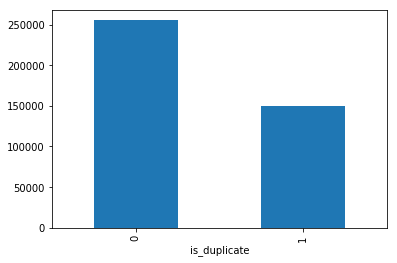

In [15]:
pd_quora.groupby('is_duplicate').size().plot(kind='bar')

## Quora Dataset Partitions (IBM)

In [16]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from src.corpus import Corpus

In [17]:
QUORA_PARTITIONS = '/home/mgimenez/Dev/corpora/Quora/Quora_question_pair_partition'

train_quora = Corpus('quora',corpus_path=QUORA_PATH, partition='train', partitions_path=QUORA_PARTITIONS)
dev_quora = Corpus('quora',corpus_path=QUORA_PATH, partition='dev', partitions_path=QUORA_PARTITIONS)
test_quora = Corpus('quora',corpus_path=QUORA_PATH, partition='test', partitions_path=QUORA_PARTITIONS)

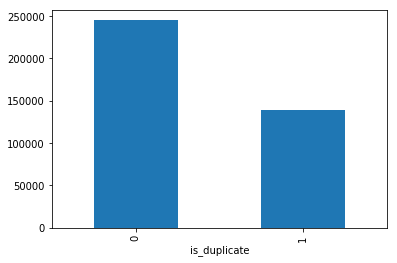

In [18]:
train_quora._data_frame.groupby('is_duplicate').size().plot(kind='bar')

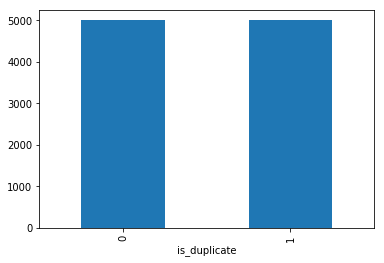

In [19]:
dev_quora._data_frame.groupby('is_duplicate').size().plot(kind='bar')

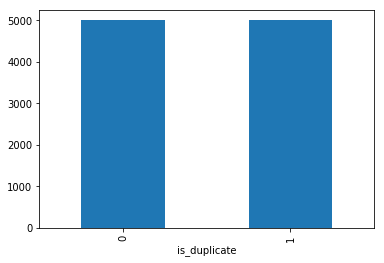

In [20]:
test_quora._data_frame.groupby('is_duplicate').size().plot(kind='bar')

## Problems

In [21]:
def get_long_questions(q_dataframe, num_words):
    num_long = 0
    for q in q_dataframe['question2'].values.tolist():
        if isinstance(q,str) and len(q.split()) > num_words:
               num_long +=1
    for q in q_dataframe['question1'].values.tolist():
        if isinstance(q,str) and len(q.split()) > num_words:
               num_long +=1
                  
    print(num_long)

In [22]:
get_long_questions(pd_quora, 50)

928


In [23]:
get_long_questions(pd_quora, 100)

30


In [24]:
get_long_questions(pd_quora, 200)

16


# Kaggle

In [25]:
from os.path import join 

KAGGLE_PATH = '/home/mgimenez/Dev/corpora/Quora/Kaggle/'
TRAIN_KAGGLE = join(KAGGLE_PATH, 'train.csv')
TEST_KAGGLE = join(KAGGLE_PATH, 'test.csv')

In [26]:
kaggle_pd = pd.read_csv(TRAIN_KAGGLE, header=0)
kaggle_pd.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [27]:
print('Total number of question pairs for training: {}'.format(kaggle_pd.shape[0]))

Total number of question pairs for training: 404290


In [28]:
non_dup, num_dup = kaggle_pd.groupby('is_duplicate').size().tolist()
print("Number of not similar pairs: {}".format(non_dup))
print("Number of similar pairs: {}".format(num_dup))

Number of not similar pairs: 255027
Number of similar pairs: 149263


In [29]:
get_long_questions(kaggle_pd, 50)

928


In [30]:
get_long_questions(kaggle_pd, 100)

30


In [31]:
get_long_questions(kaggle_pd, 200)

16


In [32]:
max_q1 = max([len(q.split()) for q in kaggle_pd['question2'].values.tolist()  if isinstance(q,str)])
max_q2 = max([len(q.split()) for q in kaggle_pd['question1'].values.tolist()  if isinstance(q,str)])
print(max_q1, max_q2)

237 125


### Kaggle test

In [34]:
kaggle_pd_test = pd.read_csv(TEST_KAGGLE, header=0)

In [35]:
kaggle_pd_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [36]:
kaggle_pd_test.shape

(2345796, 3)

In [37]:
get_long_questions(kaggle_pd_test, 50)

3851


In [38]:
get_long_questions(kaggle_pd_test, 100)

42


In [39]:
get_long_questions(kaggle_pd_test, 200)

12
